train_dataset size: 60000 
test_dataset size: 10000
Total no of parameters in Model 1: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.2969
Train Log:Epoch: 1, Step [501/60000], TrainLoss: 2.3199
Accuracy of the network on the test images: 10.95% & Test Loss: 2.313255009651184
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3067
Train Log:Epoch: 2, Step [501/60000], TrainLoss: 2.2956
Accuracy of the network on the test images: 9.31% & Test Loss: 2.308752882480621
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.2996
Train Log:Epoch: 3, Step [501/60000], TrainLoss: 2.2809
Accuracy of the network on the test images: 9.52% & Test Loss: 2.305030868053436
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2911
Train Log:Epoch: 4, Step [501/60000], TrainLoss: 2.2852
Accuracy of the network on the test images: 9.46% & Test Loss: 2.308693332672119
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2909
Train Log:Epoch: 5, Step [501/60000], TrainLoss: 2.2842
Accuracy of the network on the 

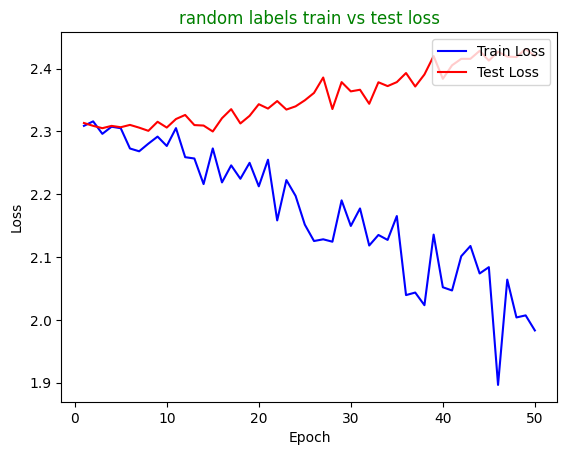

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable


#if torch.cuda.is_available():
   #DEVICE = torch.device("cuda")
#else:
   #DEVICE = torch.device("cpu")

#print(DEVICE)


torch.manual_seed(1)

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.Compose([
                                           
                                                transforms.ToTensor(),
                                               
                                                ]),  
                                           download=True,
                                          )


test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.Compose([
                                                
                                                transforms.ToTensor(),
                                          
                                                ])
                                         )

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))


# Label Randomizer

randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabel

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

examples = iter(train_loader)
example_data, example_targets = next(examples)

'''for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()'''

class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):

        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    

    for i, (data, target) in enumerate(train_loader):
        
        #if (i+1)%interval == 0 : print(i+1)  
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        # Forward propagation
        prediction = model(data)
        loss = loss_fn(prediction, target)
        #lossSum += loss.detach().numpy()
        
        #Backward prop
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        # print log
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

def test(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

#torch.manual_seed(1)

rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

train_loss_arr = []

test_loss_arr = []

epochArr = []
epochs = 50
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, test_loader)
    test_loss_arr.append(testloss)

    
#Plotting Train Vs Test Loss

plt.plot(epochArr,train_loss_arr,color="Blue")
plt.plot(epochArr,test_loss_arr,color="red")
plt.legend(['Train Loss','Test Loss'],loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("random labels train vs test loss",color = "green")
plt.show()